In [3]:
import pandas as pd

# Load the data
df = pd.read_csv('Complete_incident_2008_2024.csv', encoding='utf-8')

# Replace 'NR' strings with NaN
import numpy as np

df = df.replace('NR', np.nan)

# Drop unnecessary columns: Inc_type and Contain_Control_Date
if 'Inc_Type' in df.columns:
    df.drop(columns=['Inc_Type'], inplace=True)

if 'Contain_Control_Date' in df.columns:
    df.drop(columns=['Contain_Control_Date'], inplace=True)


# Display the head of the cleaned dataframe
print(df.head())
print("Columns after cleaning:", list(df.columns))
print("done")

                 Name GACC State  Start_Date Last_Report_Date Size_Acres  \
0     Buzzard Complex   NW    OR  07/14/2014       09/11/2014    395,747   
1     Carlton Complex   NW    WA  07/14/2014       08/28/2014    256,108   
2         Funny River   AK    AK  05/19/2014       08/14/2014    195,858   
3  Happy Camp Complex   NO    CA  08/14/2014       12/04/2014    134,056   
4                King   NO    CA  09/13/2014       10/09/2014     97,717   

  Cause          Cost    Year  
0     L   $11,062,411  2014.0  
1     L   $68,800,000  2014.0  
2     H   $11,496,627  2014.0  
3     L   $88,214,725  2014.0  
4     H  $119,000,000  2014.0  
Columns after cleaning: ['Name', 'GACC', 'State', 'Start_Date', 'Last_Report_Date', 'Size_Acres', 'Cause', 'Cost', 'Year']
done


In [4]:
# Check missing values in each column
missing_values = df.isna().sum()
print("Missing values in each column:")
print(missing_values)

# Get the total number of rows
total_rows = len(df)
print("\
Total number of rows:", total_rows)

# Calculate percentage of missing values
missing_percentage = (missing_values / total_rows) * 100
print("\
Percentage of missing values in each column:")
print(missing_percentage)

# Check data types
print("\
Data types:")
print(df.dtypes)

Missing values in each column:
Name                  1
GACC                 24
State                 0
Start_Date            0
Last_Report_Date      0
Size_Acres            0
Cause                 2
Cost                124
Year                  1
dtype: int64
Total number of rows: 470
Percentage of missing values in each column:
Name                 0.212766
GACC                 5.106383
State                0.000000
Start_Date           0.000000
Last_Report_Date     0.000000
Size_Acres           0.000000
Cause                0.425532
Cost                26.382979
Year                 0.212766
dtype: float64
Data types:
Name                 object
GACC                 object
State                object
Start_Date           object
Last_Report_Date     object
Size_Acres           object
Cause                object
Cost                 object
Year                float64
dtype: object


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data again to ensure we're working with the original dataset
df = pd.read_csv('Complete_incident_2008_2024.csv', encoding='utf-8')

# Replace 'NR' with NaN
df = df.replace('NR', np.nan)

# Drop unnecessary columns
if 'Inc_Type' in df.columns:
    df.drop(columns=['Inc_Type'], inplace=True)

if 'Contain_Control_Date' in df.columns:
    df.drop(columns=['Contain_Control_Date'], inplace=True)

print("Initial data loaded and cleaned:")
print(df.head())
print("\
Missing values:")
print(df.isna().sum())
print("\
Data types:")
print(df.dtypes)

Initial data loaded and cleaned:
                 Name GACC State  Start_Date Last_Report_Date Size_Acres  \
0     Buzzard Complex   NW    OR  07/14/2014       09/11/2014    395,747   
1     Carlton Complex   NW    WA  07/14/2014       08/28/2014    256,108   
2         Funny River   AK    AK  05/19/2014       08/14/2014    195,858   
3  Happy Camp Complex   NO    CA  08/14/2014       12/04/2014    134,056   
4                King   NO    CA  09/13/2014       10/09/2014     97,717   

  Cause          Cost    Year  
0     L   $11,062,411  2014.0  
1     L   $68,800,000  2014.0  
2     H   $11,496,627  2014.0  
3     L   $88,214,725  2014.0  
4     H  $119,000,000  2014.0  
Missing values:
Name                  1
GACC                 24
State                 0
Start_Date            0
Last_Report_Date      0
Size_Acres            0
Cause                 2
Cost                124
Year                  1
dtype: int64
Data types:
Name                 object
GACC                 object
State

In [6]:
# Handle missing Year values by filling them with the median value before converting to integer
median_year = df_prepped['Year'].median()
df_prepped['Year'] = df_prepped['Year'].fillna(median_year).astype(int)

print("Year column after filling missing values and converting to int:")
print(df_prepped['Year'].head())

print("done")

NameError: name 'df_prepped' is not defined

In [ ]:
# Let's continue with our data preparation, handling all missing values appropriately

# Copy the dataframe to avoid modifying original
df_prepped = df.copy()

# First, let's check which columns have missing values
print("Columns with missing values:")
print(df_prepped.isna().sum())

# Convert date columns to datetime
for col in ['Start_Date', 'Last_Report_Date']:
    df_prepped[col] = pd.to_datetime(df_prepped[col], errors='coerce', format='%m/%d/%Y')

# Create additional features: duration between Start_Date and Last_Report_Date in days
df_prepped['Duration_Days'] = (df_prepped['Last_Report_Date'] - df_prepped['Start_Date']).dt.days

# Clean numeric columns: Size_Acres might contain commas, remove them and convert to float
if df_prepped['Size_Acres'].dtype == object:
    df_prepped['Size_Acres'] = df_prepped['Size_Acres'].str.replace(',', '').astype(float)

# Clean the Cost column: Remove dollar signs and commas, then convert to numeric
def clean_cost(x):
    if pd.isna(x):
        return np.nan
    return float(str(x).replace('$','').replace(',',''))

df_prepped['Cost'] = df_prepped['Cost'].apply(clean_cost)

# Handle missing values in Year column before converting to integer
median_year = df_prepped['Year'].median()
df_prepped['Year'] = df_prepped['Year'].fillna(median_year).astype(int)

# Extract month from Start_Date as an additional feature
df_prepped['Start_Month'] = df_prepped['Start_Date'].dt.month

# Fill missing values in categorical columns with 'Unknown'
categorical_cols = ['GACC', 'State', 'Cause']
for col in categorical_cols:
    df_prepped[col] = df_prepped[col].fillna('Unknown')

# Check the data after preprocessing
print("\
Data types after preprocessing:")
print(df_prepped.dtypes)

print("\
Missing values after preprocessing:")
print(df_prepped.isna().sum())

print("\
Sample of preprocessed data:")
print(df_prepped.head())

print("done")

In [ ]:
# Copy original dataframe  
df_prepped = df.copy()  
  
# Convert date columns to datetime; invalid entries become NaT  
for col in ['Start_Date', 'Last_Report_Date']:  
    df_prepped[col] = pd.to_datetime(df_prepped[col], errors='coerce', format='%m/%d/%Y')  
  
# Create additional feature: duration (in days) between Start_Date and Last_Report_Date;  
# if dates are missing, fill the duration with 0  
df_prepped['Duration_Days'] = (df_prepped['Last_Report_Date'] - df_prepped['Start_Date']).dt.days  
df_prepped['Duration_Days'] = df_prepped['Duration_Days'].fillna(0).astype(int)  
  
# Clean numeric columns: Size_Acres (remove commas and convert to float)  
if df_prepped['Size_Acres'].dtype == object:  
    df_prepped['Size_Acres'] = df_prepped['Size_Acres'].str.replace(',', '').astype(float)  
  
# Clean the Cost column: remove '$' and commas then convert to float  
def clean_cost(x):  
    if pd.isna(x):  
        return np  
    return float(str(x).replace('$','').replace(',',''))  
df_prepped['Cost'] = df_prepped['Cost'].apply(clean_cost)  
  
# Handle Year: fill missing values with median and then convert to int  
median_year = df_prepped['Year'].median()  
df_prepped['Year'] = df_prepped['Year'].fillna(median_year).astype(int)  
  
# Extract month from Start_Date; if missing, fill with 0 and convert to int  
df_prepped['Start_Month'] = df_prepped['Start_Date'].dt.month.fillna(0).astype(int)  
  
# For categorical columns, fill missing with 'Unknown'  
categorical_cols = ['GACC', 'State', 'Cause']  
for col in categorical_cols:  
    df_prepped[col] = df_prepped[col].fillna('Unknown')  
  
# Check preprocessing outputs  
print("Data types after updated preprocessing:")  
print(df_prepped.dtypes, "\n")  
  
print("Missing values after updated preprocessing:")  
print(df_prepped.isna().sum(), "\n")  
  
print("Sample of updated preprocessed data:")  
print(df_prepped.head(), "\n")  
  
print("done")  

In [ ]:
df_prepped['Duration_Days'] = (df_prepped['Last_Report_Date'] - df_prepped['Start_Date']).dt.days  
df_prepped['Duration_Days'] = df_prepped['Duration_Days'].fillna(0).apply(lambda x: int(x) if pd.notna(x) else 0)  

In [ ]:
df_prepped['Start_Month'] = df_prepped['Start_Date'].dt.month  
df_prepped['Start_Month'] = df_prepped['Start_Month'].fillna(0).apply(lambda x: int(x) if pd.notna(x) else 0)  

In [ ]:
# Updated data preparation with safe integer conversion  
  
# Copy original dataframe  
df_prepped = df.copy()  
  
# Convert date columns to datetime (invalid entries become NaT)  
for col in ['Start_Date', 'Last_Report_Date']:  
    df_prepped[col] = pd.to_datetime(df_prepped[col], errors='coerce', format='%m/%d/%Y')  
  
# Create feature: Duration_Days, safely converting to int  
df_prepped['Duration_Days'] = (df_prepped['Last_Report_Date'] - df_prepped['Start_Date']).dt.days  
df_prepped['Duration_Days'] = df_prepped['Duration_Days'].fillna(0).apply(lambda x: int(x) if pd.notna(x) else 0)  
  
# Clean numeric column: Size_Acres (remove commas then convert to float)  
if df_prepped['Size_Acres'].dtype == object:  
    df_prepped['Size_Acres'] = df_prepped['Size_Acres'].str.replace(',', '').astype(float)  
  
# Clean the Cost column: remove '$' and commas then convert to float  
def clean_cost(x):  
    if pd.isna(x):  
        return np
    return float(str(x).replace('$','').replace(',',''))  
df_prepped['Cost'] = df_prepped['Cost'].apply(clean_cost)  
  
# Handle Year: fill missing with median then convert safely to int  
median_year = df_prepped['Year'].median()  
df_prepped['Year'] = df_prepped['Year'].fillna(median_year).apply(lambda x: int(x) if pd.notna(x) else 0)  
  
# Extract Start_Month safely from Start_Date: fill missing with 0, then convert to int  
df_prepped['Start_Month'] = df_prepped['Start_Date'].dt.month  
df_prepped['Start_Month'] = df_prepped['Start_Month'].fillna(0).apply(lambda x: int(x) if pd.notna(x) else 0)  
  
# For categorical columns, fill missing with 'Unknown'  
categorical_cols = ['GACC', 'State', 'Cause']  
for col in categorical_cols:  
    df_prepped[col] = df_prepped[col].fillna('Unknown')  
  
# Check preprocessing outputs  
print("Data types after updated preprocessing:")  
print(df_prepped.dtypes, "\n")  
  
print("Missing values after updated preprocessing:")  
print(df_prepped.isna().sum(), "\n")  
  
print("Sample of updated preprocessed data:")  
print(df_prepped.head(), "\n")  
  
print("done")  

In [ ]:
import pandas as pd  
import numpy as np  
  
# Load data and replace 'NR' with   
df = pd.read_csv('Complete_incident_2008_2024.csv')  
df = df.replace('NR', np)  
  
print("Data loaded. Missing values in each column:")  
print(df.isna().sum())  
print("\nSample data:")  
print(df.head())  

In [ ]:
# Convert date columns to datetime  
for col in ['Start_Date', 'Last_Report_Date']:  
    df[col] = pd.to_datetime(df[col], errors='coerce', format='%m/%d/%Y')  
      
print("After date conversion:")  
print(df[['Start_Date', 'Last_Report_Date']].head())  
print("\nMissing values in date columns:")  
print(df[['Start_Date', 'Last_Report_Date']].isna().sum())  

In [ ]:
# Compute Duration_Days  
df['Duration_Days'] = (df['Last_Report_Date'] - df['Start_Date']).dt.days  
  
print("Raw computed Duration_Days (first 10 rows):")  
print(df['Duration_Days'].head(10))  
print("\nNumber of missing values in Duration_Days before filling: ", df['Duration_Days'].isna().sum())  
  
# Check if any values are infinite  
if np.isinf(df['Duration_Days']).any():  
    print("Found infinite values in Duration_Days")  
else:  
    print("No infinite values in Duration_Days")  

In [ ]:
# Fill missing in Duration_Days with 0 and convert each element safely  
df['Duration_Days'] = df['Duration_Days'].fillna(0).apply(lambda x: int(x) if pd.notna(x) and np.isfinite(x) else 0)  
  
print("Duration_Days after conversion to int:")  
print(df['Duration_Days'].head())  
print("Data type of Duration_Days: ", df['Duration_Days'].dtype)  

In [ ]:
# Check Year column for missing or non-finite values  
print("Raw Year column (first 10 rows):")  
print(df['Year'].head(10))  
print("Missing values in Year before filling: ", df['Year'].isna().sum())  
  
# Fill missing with median if possible, or fallback to a default value (like 0 or a fixed year)  
median_year = df['Year'].median()  
print("Median Year: ", median_year)  
  
df['Year'] = df['Year'].fillna(median_year).apply(lambda x: int(x) if pd.notna(x) and np.isfinite(x) else 0)  
print("Year after conversion to int:")  
print(df['Year'].head())  
print("Data type of Year: ", df['Year'].dtype)  

In [ ]:
# Extract month from Start_Date  
df['Start_Month'] = df['Start_Date'].dt.month  
  
print("Raw Start_Month (first 10 rows):")  
print(df['Start_Month'].head(10))  
print("Missing values in Start_Month before filling: ", df['Start_Month'].isna().sum())  
  
df['Start_Month'] = df['Start_Month'].fillna(0).apply(lambda x: int(x) if pd.notna(x) and np.isfinite(x) else 0)  
print("Start_Month after conversion to int:")  
print(df['Start_Month'].head())  
print("Data type of Start_Month: ", df['Start_Month'].dtype)  # Extract month from Start_Date  
df['Start_Month'] = df['Start_Date'].dt.month  
  
print("Raw Start_Month (first 10 rows):")  
print(df['Start_Month'].head(10))  
print("Missing values in Start_Month before filling: ", df['Start_Month'].isna().sum())  
  
df['Start_Month'] = df['Start_Month'].fillna(0).apply(lambda x: int(x) if pd.notna(x) and np.isfinite(x) else 0)  
print("Start_Month after conversion to int:")  
print(df['Start_Month'].head())  
print("Data type of Start_Month: ", df['Start_Month'].dtype)  

In [ ]:
# Since there might be many unique values, let's filter out only strings that contain "module"

problematic_costs = df['Cost'][df['Cost'].astype(str).str.contains("module")]
print("Found the following problematic values in the Cost column:")
print(problematic_costs.unique())

# Also, let's check the data type of these values
print("Data types of the problematic values:")
print(problematic_costs.apply(lambda x: type(x)).unique())

print("done")

In [ ]:
# Let's examine the Cost column in more detail
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('Complete_incident_2008_2024.csv')

# Replace 'NR' with NaN
df = df.replace('NR', np.nan)

# Check the first few rows of the Cost column
print("First 10 rows of Cost column:")
print(df['Cost'].head(10))

# Check the data type of the Cost column
print("\
Data type of Cost column:", df['Cost'].dtype)

# Check for any unusual values in Cost
print("\
Unique values in Cost column (showing first 20):")
unique_costs = df['Cost'].unique()
print(unique_costs[:20])

# Check if any values in Cost contain unexpected characters
print("\
Checking for unusual characters in Cost values:")
for i, cost in enumerate(unique_costs[:50]):  # Check first 50 unique values
    if pd.notna(cost) and not isinstance(cost, (int, float)):
        # Check if the cost string contains characters other than digits, commas, $, or decimal point
        cost_str = str(cost)
        if any(c not in "0123456789,.$" for c in cost_str):
            print(f"Unusual value found: {cost} (type: {type(cost)})")

print("done")

In [ ]:
# Clean numeric columns: Size_Acres - remove commas and convert to float if required  
if df['Size_Acres'].dtype == object:  
    df['Size_Acres'] = df['Size_Acres'].str.replace(',', '').astype(float)  
  
# Clean the Cost column: remove '$' and commas, then convert to float  
def clean_cost(x):  
    if pd.isna(x):  
        return np  
    return float(str(x).replace('$','').replace(',',''))  
  
df['Cost'] = df['Cost'].apply(clean_cost)  
print("Size_Acres and Cost sample data:")  
print(df[['Size_Acres', 'Cost']].head())  

In [ ]:
# Replace any instance of 'Unknown' in the Cause column into 'U'
df['Cause'] = df['Cause'].replace('Unknown', 'U')

# Verify the replacement
print(df['Cause'].value_counts())
print("Replaced all instances of 'Unknown' with 'U' in Cause column.")

In [32]:
# Preprocessing steps for machine learning preparation
import pandas as pd
import numpy as np

# Load the already cleaned data
df = pd.read_csv('cleaned_incident_data.csv')

# Step 1: Convert date columns to datetime and extract additional date features
for col in ['Start_Date', 'Last_Report_Date']:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d', errors='coerce')

# Extract additional features from Start_Date
# For example: year, month, day, weekday
df['Start_Year'] = df['Start_Date'].dt.year
df['Start_Month'] = df['Start_Date'].dt.month  # reassign this to be sure
df['Start_Day'] = df['Start_Date'].dt.day
df['Start_Weekday'] = df['Start_Date'].dt.weekday

# Optionally extract similar features for Last_Report_Date
df['Last_Year'] = df['Last_Report_Date'].dt.year

# Step 2: Address missing values in Cost column using median imputation
median_cost = df['Cost'].median()
df['Cost'] = df['Cost'].fillna(median_cost)

# Step 3: Encode categorical variables using one-hot encoding
categorical_cols = ['GACC', 'State', 'Cause', 'Inc_Type']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Check the resulting dataframe
print("DataFrame shape after preprocessing:", df_encoded.shape)
print("\
Sample data (head):")
print(df_encoded.head())

# Save the processed dataframe
df_encoded.to_csv('ml_ready_incident_data.csv', index=False)
print("\
Processed data saved to 'ml_ready_incident_data.csv'")

print("done")

DataFrame shape after preprocessing: (470, 48)
Sample data (head):
                 Name Start_Date Last_Report_Date  Size_Acres         Cost  \
0     Buzzard Complex 2014-07-14       2014-09-11    395747.0   11062411.0   
1     Carlton Complex 2014-07-14       2014-08-28    256108.0   68800000.0   
2         Funny River 2014-05-19       2014-08-14    195858.0   11496627.0   
3  Happy Camp Complex 2014-08-14       2014-12-04    134056.0   88214725.0   
4                King 2014-09-13       2014-10-09     97717.0  119000000.0   

     Year  Duration_Days  Start_Month  Start_Year  Start_Day  ...  \
0  2014.0             59            7        2014         14  ...   
1  2014.0             45            7        2014         14  ...   
2  2014.0             87            5        2014         19  ...   
3  2014.0            112            8        2014         14  ...   
4  2014.0             26            9        2014         13  ...   

   State_OR/NV  State_SD  State_TX  State_UT  Sta

In [33]:
# Cell 1: Train a predictive model on the ML-ready dataset  
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  
from sklearn.preprocessing import StandardScaler  
  
# Load the ML-ready dataset (it should be preprocessed and one-hot encoded)  
ml_df = pd.read_csv('ml_ready_incident_data.csv')  
  
# We'll assume that the Cost column in the ML-ready data is fully available (no missing values)  
# Select a set of features (numeric + one-hot encoded category columns)  
# For this example, we are using these numeric features:  
numeric_features = ['Size_Acres', 'Year', 'Duration_Days', 'Start_Month']  
# And these categorical features (one-hot encoded in the ML-ready dataset):  
categorical_features = ['GACC', 'State', 'Cause', 'Inc_Type']  
  
# Gather all numeric features and one-hot encoded categorical features  
# (We assume one-hot encoding is done; we select columns that are in either numeric_features  
# or whose names start with the categorical feature names plus an underscore "_")  
feature_cols = [col for col in ml_df.columns if (col in numeric_features)   
                or any(col.startswith(feat + '_') for feat in categorical_features)]  
  
# Define X (features) and y (target)  
X = ml_df[feature_cols]  
y = ml_df['Cost']  
  
# Split the data into train and test sets (for evaluation)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
  
# Scale the numeric features using StandardScaler  
scaler = StandardScaler()  
for col in numeric_features:  
    if col in X_train.columns:  
        X_train[col] = scaler.fit_transform(X_train[[col]])  
        X_test[col] = scaler.transform(X_test[[col]])  
  
# Train a Random Forest regressor as the model  
model = RandomForestRegressor(n_estimators=100, random_state=42)  
model.fit(X_train, y_train)  
  
# Evaluate the model on the test set  
y_pred = model.predict(X_test)  
mae = mean_absolute_error(y_test, y_pred)  
rmse = mean_squared_error(y_test, y_pred, squared=False)  
r2 = r2_score(y_test, y_pred)  
  
print("Model Evaluation on ML-ready dataset:")  
print("Mean Absolute Error: $", mae)  
print("Root Mean Squared Error: $", rmse)  
print("R² Score:", r2)  
  
# Store the list of feature names and the scaling parameters for numeric features  
scaling_params = {col: (X_train[col].mean(), X_train[col].std()) for col in numeric_features if col in X_train.columns}  
  
# Save the model, feature list, and scaler parameters if needed (optional, e.g., using joblib)  
# For now, we will continue using these objects in the next cell.  
print("Model training complete. Run the next cell to impute missing Cost values in the original dataset.")  

Model Evaluation on ML-ready dataset:
Mean Absolute Error: $ 13388134.764893616
Root Mean Squared Error: $ 24883440.160131194
R² Score: 0.2981903785840828
Model training complete. Run the next cell to impute missing Cost values in the original dataset.


C:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [41]:
# ----- Cell: Impute Missing Cost Values in Original Dataset with Aligned One-Hot Encoding -----  
import pandas as pd  
import numpy as np  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.preprocessing import StandardScaler  
  
# Load the ML-ready dataset  
ml_ready_df = pd.read_csv('ml_ready_incident_data.csv')  
  
# Identify the categorical features used in one-hot encoding (as per ML-ready)  
categorical_features = ['GACC', 'State', 'Cause', 'Inc_Type']  
numeric_features = ['Size_Acres', 'Year', 'Duration_Days', 'Start_Month']  
  
# Retrieve the reference one-hot encoded columns from the ML-ready dataset for these features  
reference_cols = []  
for feature in categorical_features:  
    ref = [col for col in ml_ready_df.columns if col.startswith(feature + '_')]  
    reference_cols.extend(ref)  
  
# Also include the numeric features  
model_features = numeric_features + reference_cols  
  
# Load and prepare the original dataset  
original_df = pd.read_csv('Complete_incident_2008_2024.csv')  
original_df = original_df.replace('NR', np)  
  
# Clean numeric columns (Cost and Size_Acres)  
original_df['Cost'] = pd.to_numeric(original_df['Cost'].str.replace('$','').str.replace(',', ''), errors='coerce')  
original_df['Size_Acres'] = pd.to_numeric(original_df['Size_Acres'].str.replace(',', ''), errors='coerce')  
  
# Convert date columns and create additional features  
for col in ['Start_Date', 'Last_Report_Date']:  
    original_df[col] = pd.to_datetime(original_df[col], errors='coerce')  
original_df['Duration_Days'] = (original_df['Last_Report_Date'] - original_df['Start_Date']).dt.days  
original_df['Start_Month'] = original_df['Start_Date'].dt.month  
  
# Create missing value mask for Cost  
missing_mask = original_df['Cost'].isna()  
  
# One-hot encode the categorical features for the original dataset  
original_encoded = pd.get_dummies(original_df, columns=categorical_features, drop_first=True)  
  
# Reindex the one-hot encoded columns to match the reference from ML-ready dataset.  
# For each categorical feature, ensure that the same columns are present.  
# First, create a dataframe with the one-hot encoded categorical features from the original dataset:  
one_hot_cols = [col for col in original_encoded.columns if any(col.startswith(feat + '_') for feat in categorical_features)]  
  
# There might be extra one-hot columns present in the original; we need to keep only those in reference_cols.  
# But some reference columns might be missing --> add them with zeros.  
original_encoded = original_encoded.reindex(columns=(numeric_features + reference_cols), fill_value=0)  
  
# Also, if there are additional columns from numeric_features that weren't one-hot encoded, include them.  
# For alignment, we now have a consistent feature set.  
X_original = original_encoded.copy()  
  
# Scale numeric features to match the ML-ready scaling if possible.  
# We'll compute scaling parameters from the ML-ready dataset.  
scaler = StandardScaler()  
ml_ready_numeric = ml_ready_df[numeric_features].copy()  
scaler.fit(ml_ready_numeric)  
  
for col in numeric_features:  
    if col in X_original.columns:  
        X_original[col] = scaler.transform(X_original[[col]])  
  
# Train the model using the ML-ready dataset with aligned model_features.  
X_ml = ml_ready_df[model_features].copy()  
y_ml = ml_ready_df['Cost']  
# Ensure scaling on ML-ready too  
for col in numeric_features:  
    if col in X_ml.columns:  
        X_ml[col] = scaler.transform(X_ml[[col]])  
          
model = RandomForestRegressor(n_estimators=100, random_state=42)  
model.fit(X_ml, y_ml)  
  
# For the original dataset rows with missing Cost, predict the Cost using the aligned features  
df_missing = original_df[missing_mask].copy()  
# We need to prepare features for missing rows using the same one-hot rules.  
original_missing_encoded = pd.get_dummies(df_missing, columns=categorical_features, drop_first=True)  
original_missing_encoded = original_missing_encoded.reindex(columns=(numeric_features + reference_cols), fill_value=0)  
  
# Scale the numeric features for the missing rows  
for col in numeric_features:  
    if col in original_missing_encoded.columns:  
        original_missing_encoded[col] = scaler.transform(original_missing_encoded[[col]])  
  
# Before prediction, ensure no  values exist in the features (you can fillna if needed)  
original_missing_encoded.fillna(0, inplace=True)  
  
# Predict missing Cost values  
predicted_costs = model.predict(original_missing_encoded)  
  
# Append an asterisk to denote imputation  
predicted_costs_formatted = [str(round(val, 2)) + '*' for val in predicted_costs]  
  
# Create a new column 'Cost_Imputed': use original if available, otherwise the predicted (with asterisk)  
original_df['Cost_Imputed'] = original_df['Cost'].apply(lambda x: str(round(x, 2)) if pd.notna(x) else np)  
original_df.loc[missing_mask, 'Cost_Imputed'] = predicted_costs_formatted  
  
# Show sample of rows with imputed Cost values  
print('Sample of imputed Cost values:')  
print(original_df.loc[missing_mask, ['Name', 'Cost', 'Cost_Imputed']].head())  
  
# Save the updated dataset  
original_df.to_csv('Complete_incident_2008_2024_imputed.csv', index=False)  
print("Updated dataset with imputed Cost values saved as 'Complete_incident_2008_2024_imputed.csv'")  

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Duration_Days
- Start_Month
- Year


In [46]:
# ----- Complete Code Cell: Process original data and impute missing Cost values -----  
import pandas as pd  
import numpy as np  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.preprocessing import StandardScaler  
from datetime import datetime  
  
# ---------- Load and Process ML-ready Data (to get reference encoding and scaling parameters) ----------  
ml_ready_df = pd.read_csv('ml_ready_incident_data.csv')  
  
# Define categorical and numeric features that were used for model training  
categorical_features = ['GACC', 'State', 'Cause', 'Inc_Type']  
numeric_features = ['Size_Acres', 'Year', 'Duration_Days', 'Start_Month']  
  
# Get the reference one-hot encoded column names from ML-ready data (for the categorical features)  
reference_cols = []  
for feat in categorical_features:  
    cols = [col for col in ml_ready_df.columns if col.startswith(feat + '_')]  
    reference_cols.extend(cols)  
      
# Define the full list of model features  
model_features = numeric_features + reference_cols  
  
# Fit a scaler on the numeric features from ml_ready_df (we assume these features are numeric)  
scaler = StandardScaler()  
scaler.fit(ml_ready_df[numeric_features])  
  
# Train the Random Forest model on the ML-ready data  
X_ml = ml_ready_df[model_features]  
y_ml = ml_ready_df['Cost']  
model = RandomForestRegressor(n_estimators=100, random_state=42)  
model.fit(X_ml, y_ml)  
  
# ---------- Load and Process the Original Dataset ----------  
# Load original dataset  
original_df = pd.read_csv('Complete_incident_2008_2024.csv')  
original_df = original_df.replace('NR', np)  
  
# Clean numeric columns: Convert Cost and Size_Acres  
original_df['Cost'] = pd.to_numeric(original_df['Cost'].str.replace('$','').str.replace(',', ''), errors='coerce')  
original_df['Size_Acres'] = pd.to_numeric(original_df['Size_Acres'].str.replace(',', ''), errors='coerce')  
  
# Process date columns to compute derived features (ensure date columns are present)  
original_df['Start_Date'] = pd.to_datetime(original_df['Start_Date'], errors='coerce')  
original_df['Last_Report_Date'] = pd.to_datetime(original_df['Last_Report_Date'], errors='coerce')  
  
# Create derived features:  
original_df['Duration_Days'] = (original_df['Last_Report_Date'] - original_df['Start_Date']).dt.days  
original_df['Start_Month'] = original_df['Start_Date'].dt.month  
# If Year is not already present, extract it from Start_Date  
if 'Year' not in original_df.columns or original_df['Year'].isna().all():  
    original_df['Year'] = original_df['Start_Date'].dt.year  
  
# ---------- Identify rows with missing Cost ----------  
missing_mask = original_df['Cost'].isna()  
  
# ---------- One-hot encode the categorical features ----------  
original_encoded = pd.get_dummies(original_df, columns=categorical_features, drop_first=True)  
  
# The original_encoded dataset might be missing some derived feature columns that our model expects.  
# We need to ensure that columns in our model_features list exist.  
# If a numeric feature like 'Duration_Days', 'Start_Month', or 'Year' is missing, we create it or fill with .  
for col in numeric_features:  
    if col not in original_encoded.columns:  
        original_encoded[col] = np  
  
# Subset the rows with missing Cost for prediction  
df_missing = original_encoded.loc[missing_mask].copy()  
  
# Reindex the one-hot encoded categorical columns to match the ML-ready reference.  
# Our expected feature set is numeric_features + reference_cols.  
df_missing_aligned = df_missing.reindex(columns = numeric_features + reference_cols, fill_value=0)  
  
# For any numeric features with missing values, you may impute with median (from ml_ready data as reference)  
for col in numeric_features:  
    # Use the median value from ml_ready data  
    median_val = ml_ready_df[col].median()  
    df_missing_aligned[col] = df_missing_aligned[col].fillna(median_val)  
  
# Scale numeric features using the scaler from ml_ready data  
for col in numeric_features:  
    df_missing_aligned[col] = scaler.transform(df_missing_aligned[[col]])  
  
# Ensure no  remains  
df_missing_aligned.fillna(0, inplace=True)  
  
# ---------- Predict missing Cost values ----------  
predicted_costs = model.predict(df_missing_aligned)  
predicted_costs_formatted = [str(round(val, 2)) + '*' for val in predicted_costs]  
  
# Create a new column 'Cost_Imputed' in original_df: use original if available, else imputed value  
original_df['Cost_Imputed'] = original_df['Cost'].apply(lambda x: str(round(x, 2)) if pd.notna(x) else np)  
original_df.loc[missing_mask, 'Cost_Imputed'] = predicted_costs_formatted  
  
# Display sample rows with imputed values  
print('Sample of rows with imputed Cost values:')  
print(original_df.loc[missing_mask, ['Name', 'Cost', 'Cost_Imputed']].head())  
  
# Save the updated dataset  
original_df.to_csv('Complete_incident_2008_2024_imputed.csv', index=False)  
print("Updated dataset with imputed Cost values saved as 'Complete_incident_2008_2024_imputed.csv")  

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Duration_Days
- Start_Month
- Year


In [47]:
import pandas as pd  
import numpy as np  
from xgboost import XGBRegressor  
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split  
import pickle  
  
# --- Load and Process the ML-ready Dataset ---  
ml_ready_df = pd.read_csv('ml_ready_incident_data.csv')  
  
# Clean numeric columns  
ml_ready_df['Cost'] = pd.to_numeric(ml_ready_df['Cost'].astype(str).str.replace('$','').str.replace(',', ''), errors='coerce')  
ml_ready_df['Size_Acres'] = pd.to_numeric(ml_ready_df['Size_Acres'].astype(str).str.replace(',', ''), errors='coerce')  
  
# Process date columns (if available; adjust these names if needed)  
ml_ready_df['Start_Date'] = pd.to_datetime(ml_ready_df['Start_Date'], errors='coerce')  
ml_ready_df['Last_Report_Date'] = pd.to_datetime(ml_ready_df['Last_Report_Date'], errors='coerce')  
ml_ready_df['Duration_Days'] = (ml_ready_df['Last_Report_Date'] - ml_ready_df['Start_Date']).dt.days  
ml_ready_df['Start_Month'] = ml_ready_df['Start_Date'].dt.month  
ml_ready_df['Year'] = ml_ready_df['Start_Date'].dt.year  
  
# Define features to use  
categorical_features = ['GACC', 'State', 'Cause', 'Inc_Type']  
numeric_features = ['Size_Acres', 'Year', 'Duration_Days', 'Start_Month']  
  
# One-hot encode the categorical features  
ml_ready_encoded = pd.get_dummies(ml_ready_df, columns=categorical_features)  
  
# Define the model's feature set (all numeric features and one-hot encoded columns that start with the categorical feature names)  
# Use the ML-ready encoded columns as reference.  
reference_cols = []  
for feat in categorical_features:  
    cols = [col for col in ml_ready_encoded.columns if col.startswith(feat + '_')]  
    reference_cols.extend(cols)  
      
model_features = numeric_features + reference_cols  
  
# Prepare training data  
X = ml_ready_encoded[model_features]  
y = ml_ready_encoded['Cost']  
  
# Fit a StandardScaler on the numeric features from the ML-ready data  
scaler = StandardScaler()  
X[numeric_features] = scaler.fit_transform(X[numeric_features])  
  
# Split the data for evaluation (optional)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
  
# Train the XGBoost model  
xgb_model = XGBRegressor(n_estimators=100, random_state=42)  
xgb_model.fit(X_train, y_train)  
  
# (Optional) Evaluate the model  
y_pred = xgb_model.predict(X_test)  
from sklearn.metrics import mean_absolute_error  
print('MAE on test set:', mean_absolute_error(y_test, y_pred))  
  
# Save the trained model, scaler, and columns for reference  
pickle.dump(xgb_model, open('xgb_model.pkl', 'wb'))  
pickle.dump(scaler, open('scaler.pkl', 'wb'))  
pickle.dump(model_features, open('model_features.pkl', 'wb'))  
  
print("Trained XGBoost model and saved scaler and feature names.")  

KeyError: "None of [Index(['GACC', 'State', 'Cause', 'Inc_Type'], dtype='object')] are in the [columns]"


ML-ready dataset shape: (470, 48)
First few rows of ML-ready dataset:
                 Name  Start_Date Last_Report_Date  Size_Acres         Cost  \
0     Buzzard Complex  2014-07-14       2014-09-11    395747.0   11062411.0   
1     Carlton Complex  2014-07-14       2014-08-28    256108.0   68800000.0   
2         Funny River  2014-05-19       2014-08-14    195858.0   11496627.0   
3  Happy Camp Complex  2014-08-14       2014-12-04    134056.0   88214725.0   
4                King  2014-09-13       2014-10-09     97717.0  119000000.0   

     Year  Duration_Days  Start_Month  Start_Year  Start_Day  ...  \
0  2014.0             59            7        2014         14  ...   
1  2014.0             45            7        2014         14  ...   
2  2014.0             87            5        2014         19  ...   
3  2014.0            112            8        2014         14  ...   
4  2014.0             26            9        2014         13  ...   

   State_OR/NV  State_SD  State_TX  Sta

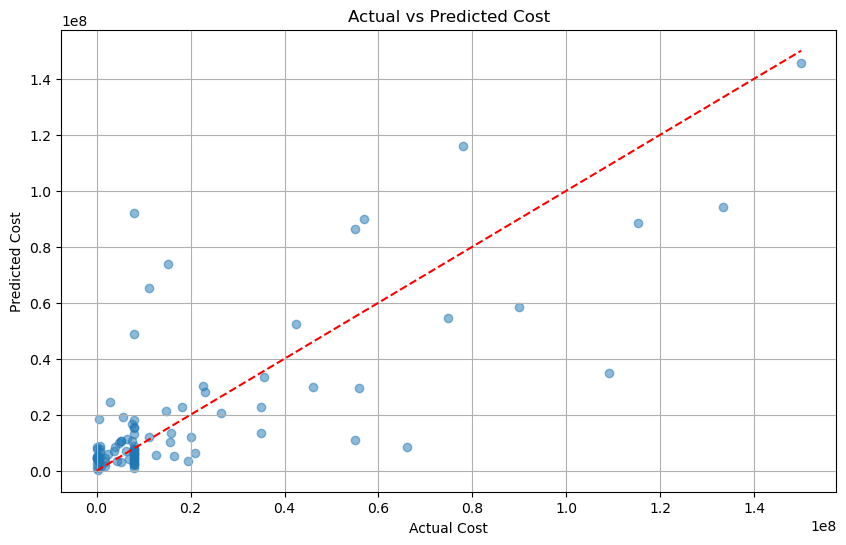

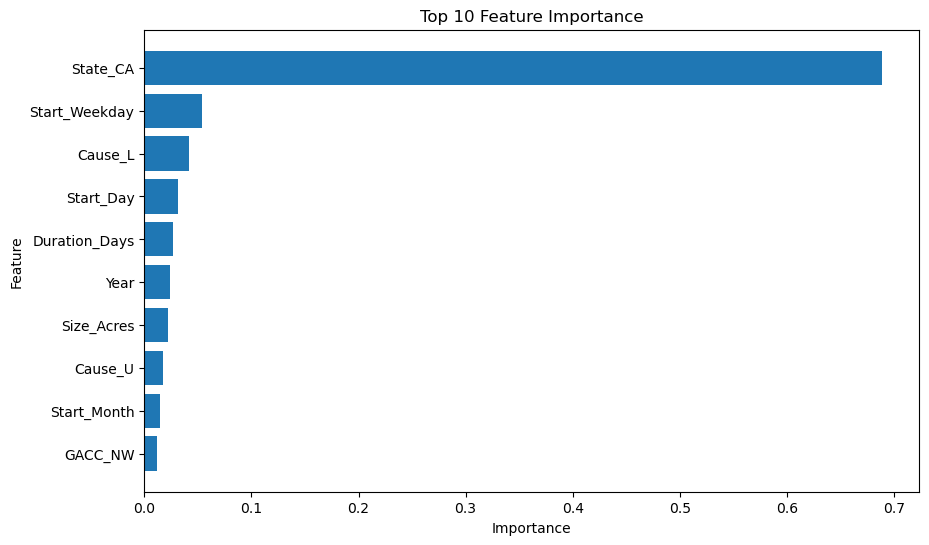

Top 10 most important features:
          Feature  Importance
20       State_CA    0.688678
6   Start_Weekday    0.054373
40        Cause_L    0.041480
5       Start_Day    0.031143
2   Duration_Days    0.026641
1            Year    0.024245
0      Size_Acres    0.022704
42        Cause_U    0.017695
3     Start_Month    0.015059
11        GACC_NW    0.012249
done


In [48]:
%pip install xgboost

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the ML-ready dataset
ml_ready_df = pd.read_csv('ml_ready_incident_data.csv')

print("ML-ready dataset shape:", ml_ready_df.shape)
print("First few rows of ML-ready dataset:")
print(ml_ready_df.head())

# Define the target variable and features
# Target is the Cost column
y = ml_ready_df['Cost']

# Features are all columns except 'Name', 'Start_Date', 'Last_Report_Date', and 'Cost'
X = ml_ready_df.drop(['Name', 'Start_Date', 'Last_Report_Date', 'Cost'], axis=1)

print("\
Features shape:", X.shape)
print("Target shape:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
print("\
Training XGBoost model...")
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\
Model Evaluation:")
print("Mean Absolute Error: $" + str(round(mae,2)))
print("Mean Squared Error: $" + str(round(mse,2)))
print("Root Mean Squared Error: $" + str(round(rmse,2)))
print("R² Score: " + str(round(r2,4)))

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.title('Actual vs Predicted Cost')
plt.grid(True)
plt.show()

# Feature importance
feature_importance = xgb_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

print("\
Top 10 most important features:")
print(importance_df)

print("done")

ML-ready dataset shape: (470, 48)
Cleaned dataset shape: (470, 12)
ML-ready dataset columns: ['Name', 'Start_Date', 'Last_Report_Date', 'Size_Acres', 'Cost', 'Year', 'Duration_Days', 'Start_Month', 'Start_Year', 'Start_Day', 'Start_Weekday', 'Last_Year', 'GACC_EB', 'GACC_GB', 'GACC_NO', 'GACC_NW', 'GACC_NW/WB', 'GACC_RM', 'GACC_SA', 'GACC_SO', 'GACC_SW', 'GACC_Unknown', 'GACC_WB', 'State_AZ', 'State_CA', 'State_CO', 'State_FL', 'State_GA', 'State_ID', 'State_KS', 'State_MN', 'State_MT', 'State_NC', 'State_NE', 'State_NM', 'State_NV', 'State_OK', 'State_OR', 'State_OR/NV', 'State_SD', 'State_TX', 'State_UT', 'State_WA', 'State_WY', 'Cause_L', 'Cause_N', 'Cause_U', 'Cause_Unknown']
Cleaned dataset columns: ['Name', 'GACC', 'State', 'Start_Date', 'Last_Report_Date', 'Size_Acres', 'Cause', 'Cost', 'Inc_Type', 'Year', 'Duration_Days', 'Start_Month']
Training XGBoost model on ML-ready data...
Preparing cleaned dataset for prediction...
Number of rows with missing Cost values: 124
Sample rows

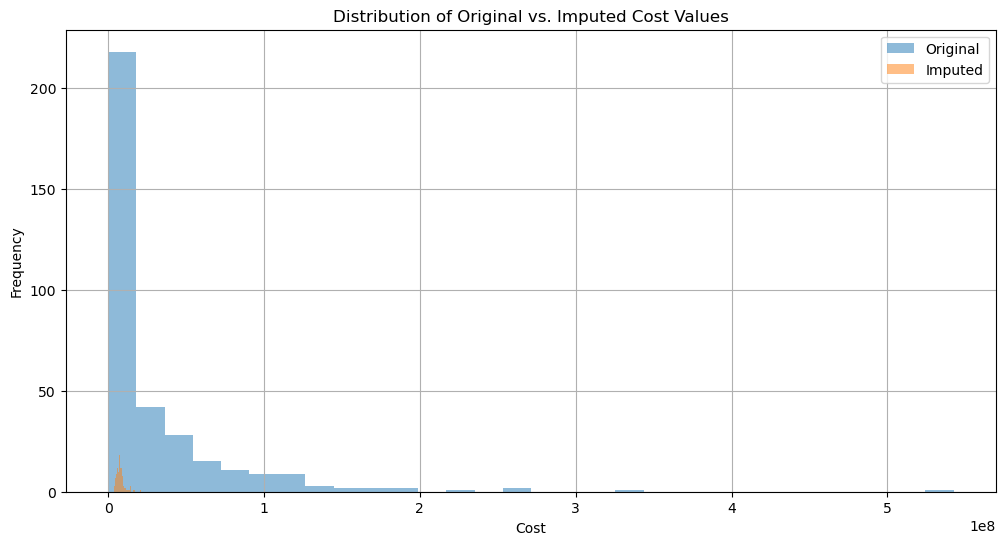

done


In [49]:
# Let's use the ML-ready dataset to train an XGBoost model and predict missing Cost values in the cleaned dataset
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load both datasets
ml_ready_df = pd.read_csv('ml_ready_incident_data.csv')
cleaned_df = pd.read_csv('cleaned_incident_data.csv')

print("ML-ready dataset shape:", ml_ready_df.shape)
print("Cleaned dataset shape:", cleaned_df.shape)

# Check the columns in both datasets
print("\
ML-ready dataset columns:", ml_ready_df.columns.tolist())
print("\
Cleaned dataset columns:", cleaned_df.columns.tolist())

# Define the target variable and features for the ML-ready dataset
# Target is the Cost column
y = ml_ready_df['Cost']

# Features are all columns except 'Name', 'Start_Date', 'Last_Report_Date', and 'Cost'
X = ml_ready_df.drop(['Name', 'Start_Date', 'Last_Report_Date', 'Cost'], axis=1)

print("\
Training XGBoost model on ML-ready data...")
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X, y)

# Now we need to prepare the cleaned dataset to match the feature format of the ML-ready dataset
print("\
Preparing cleaned dataset for prediction...")

# First, let's check which rows have missing Cost values
missing_cost_mask = cleaned_df['Cost'].isna()
print(f"Number of rows with missing Cost values: {missing_cost_mask.sum()}")

# Display a few rows with missing Cost values
print("\
Sample rows with missing Cost values:")
print(cleaned_df[missing_cost_mask][['Name', 'Start_Date', 'Last_Report_Date', 'Size_Acres']].head())

# We need to transform the cleaned dataset to match the feature format of the ML-ready dataset
# This involves one-hot encoding categorical variables and creating the same derived features

# First, let's check if the cleaned dataset has the same categorical columns as the ML-ready dataset
categorical_cols = ['GACC', 'State', 'Cause', 'Inc_Type']
for col in categorical_cols:
    if col in cleaned_df.columns:
        print(f"\
Unique values in {col} column of cleaned dataset:")
        print(cleaned_df[col].unique())

# Let's create a function to transform the cleaned dataset to match the ML-ready dataset format
def transform_to_ml_ready_format(df):
    # Create a copy of the dataframe to avoid modifying the original
    transformed_df = df.copy()
    
    # Process date columns
    transformed_df['Start_Date'] = pd.to_datetime(transformed_df['Start_Date'], errors='coerce')
    transformed_df['Last_Report_Date'] = pd.to_datetime(transformed_df['Last_Report_Date'], errors='coerce')
    
    # Create derived features
    transformed_df['Start_Year'] = transformed_df['Start_Date'].dt.year
    transformed_df['Start_Day'] = transformed_df['Start_Date'].dt.day
    transformed_df['Start_Weekday'] = transformed_df['Start_Date'].dt.weekday
    transformed_df['Last_Year'] = transformed_df['Last_Report_Date'].dt.year
    
    # One-hot encode categorical variables
    categorical_cols = ['GACC', 'State', 'Cause', 'Inc_Type']
    transformed_df = pd.get_dummies(transformed_df, columns=categorical_cols)
    
    return transformed_df

# Transform the cleaned dataset
transformed_cleaned_df = transform_to_ml_ready_format(cleaned_df)

print("\
Transformed cleaned dataset shape:", transformed_cleaned_df.shape)
print("\
Transformed cleaned dataset columns:", transformed_cleaned_df.columns.tolist())

# Now we need to align the columns of the transformed cleaned dataset with the ML-ready dataset
# Get the feature columns from the ML-ready dataset (excluding 'Name', 'Start_Date', 'Last_Report_Date', and 'Cost')
ml_ready_feature_cols = X.columns.tolist()

# Create a DataFrame with the same columns as the ML-ready features, filled with zeros
aligned_features = pd.DataFrame(0, index=transformed_cleaned_df.index, columns=ml_ready_feature_cols)

# Fill in the values for columns that exist in both datasets
for col in ml_ready_feature_cols:
    if col in transformed_cleaned_df.columns:
        aligned_features[col] = transformed_cleaned_df[col]

print("\
Aligned features shape:", aligned_features.shape)

# Now we can predict the missing Cost values
# Get the rows with missing Cost values
missing_cost_features = aligned_features[missing_cost_mask]

print("\
Predicting missing Cost values...")
predicted_costs = xgb_model.predict(missing_cost_features)

# Add the predicted Cost values to the cleaned dataset
cleaned_df.loc[missing_cost_mask, 'Cost'] = predicted_costs

# Mark the imputed values with an asterisk in a new column
cleaned_df['Cost_Source'] = 'Original'
cleaned_df.loc[missing_cost_mask, 'Cost_Source'] = 'Imputed'

# Save the updated dataset
cleaned_df.to_csv('cleaned_incident_data_imputed.csv', index=False)

print("\
Missing Cost values have been imputed and saved to 'cleaned_incident_data_imputed.csv'")
print("\
Sample of imputed Cost values:")
print(cleaned_df[cleaned_df['Cost_Source'] == 'Imputed'][['Name', 'Start_Date', 'Last_Report_Date', 'Size_Acres', 'Cost', 'Cost_Source']].head())

# Let's also create a histogram of the original vs. imputed Cost values
plt.figure(figsize=(12, 6))

# Original Cost values
original_costs = cleaned_df[cleaned_df['Cost_Source'] == 'Original']['Cost']
plt.hist(original_costs, bins=30, alpha=0.5, label='Original')

# Imputed Cost values
imputed_costs = cleaned_df[cleaned_df['Cost_Source'] == 'Imputed']['Cost']
plt.hist(imputed_costs, bins=30, alpha=0.5, label='Imputed')

plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Distribution of Original vs. Imputed Cost Values')
plt.legend()
plt.grid(True)
plt.show()

print("done")